# Transmission matrix 
## acquisition, calculation and phase conjugation

### Phase shift interferometry (4-step)
this method can be used to measure the complext field of an interference pattern and it actually removes the mean amplitude term from the equation.


The light intensity measured on the camera is:

$$I_{\rm{camera}} = |e^{ia}E_{\rm{ref}}+E_{\rm{(x,y)}}|^2, $$

$E_{\rm{ref}}$ is the non-modulated part of the beam which acts as a local oscillator, 

$E_{\rm{(x, y)}}$ is the SML-modulated part of the beam,

$a$ is the phase which in this case will take four values: $0, \pi, \pi/2, 3\pi/2$. Therefore four each SLM pattern, four measurements will be carried out. 

The complex field is found to be:

$$E_{\rm{(x,y)}} =\frac{1}{E_{\rm{ref}}} \Bigg( \frac{I_0 - I_\pi}{4} + i \frac{I_{3\pi/2} - I_{\pi/2}}{4}\Bigg)$$



 On the pixel $j$ of the camera one gets the following field:
 
$$ \frac{I_0^j - I_\pi^j}{4} + i \frac{I_{3\pi/2}^j - I_{\pi/2}^j}{4} = \overline{s}^j \sum_i h^{ij} E_{\rm{in}}^i, $$

where

i: pixel on the slm

j: pixel on the camera

And the observed transmission matrix is:

$$ h_{ij}^{\rm{obs}} =  \frac{I_0^j - I_\pi^j}{4} + i \frac{I_{3\pi/2}^j - I_{\pi/2}^j}{4}. $$

### Effect of referecence beam and normalization
The observed transmission matrix has is affected by the reference beam. It has been shown that for a homogenous laser beam at the input of the SLM, this effect is statit at the output pixels; it is the same at a given pixel (see Popoff PhD). Therefore this effect can be reduced on the observed matrix by normalizing the latter by the standard deviation on a camera pixel, calculated for all the input vectors:

$$h_{ij}^{\rm{filtered}} = \frac{h_{ij}^{\rm{obs}}}{\sqrt{\langle|h_{ij}^{\rm{obs}}|^2\rangle}_i}$$, 

where $\sqrt{\langle|h_{ij}^{\rm{obs}}|^2\rangle}_i$ is the standard deviation. 

### Basis change
The filtered transmission matrix $h_{ij}^{\rm{filtered}}$ gives the relationship between and hadamard vector and the camera pixels. What we need in the end is a transmission matrix that gives the relationship between a SLM pixel and the camera pixels. 

For this, a basis change (from the hadamard basis to the canonical one) is needed to find the real transmission matrix:

$$H^{\rm{can}} = H_{\rm{ij}}^{\rm{had}} \times \mathcal{H}, $$

with $\mathcal{H}$ the corresponding Hadamard matrix. 

#### import libraries

In [2]:
from slmOptim.initializer.init_experiment import InitExperiment
from slmOptim.loader import patterns as pt

from slmOptim.optimizer import transmission_matrix, phase_conjugation
from slmOptim.utils import plot_func, upload

from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy import ndimage
import matplotlib.pyplot as plt
import numpy as np
import pickle
import time, os
from matplotlib.colors import LogNorm
import time

#### set experiment parameters

In [3]:
# SLM resolution 
resX, resY = (800, 600)

# the number of controlled segments on the SLM num_in ** 2
num_in = 4
# size of macropixels on slm 2 ** slm_macropix
slm_macropixel = 88
pat_offset = (10, 0)

# 2pi value
slm_calib_px = 112

# Define observation window on camera
roi_size = 600
off = (-10, 20)
off = (-20, 50)
off = (0, 0)

# roi = cam.set_roi(roi_size, off)
# print(roi)

# Define camera macropixel, this is defined by the measured speckel grain
bins = 2

# Define camera acquisition parameters
exposure_time = 150
gain = 1
timeout= 100

# path to save raw data
path = '/home/optomeca/Documents/measurements'

#### initiliaze hardware: camera and slm

In [350]:
init = InitExperiment(roi_size, off, bins, exposure_time, gain, timeout)
camera = init.init_cam()
slm = init.init_slm()

frame1 = camera.get_pending_frame_or_null()
frame1 = np.copy(frame1.image_buffer)

plt.imshow(frame1)
plt.colorbar()

# init.close_cam()




#### load dataset

In [133]:
# create pattern loader - here hadamard patterns
pattern_loader = pt.HadamardPatternGenerator(num_in ** 2, slm_calib_px)


352


#### just do some quick checks

In [47]:
i = 20
pattern, frame = plot_func.pattern_frame(slm, camera, 
                                                 pattern_loader[i], 
                                                 slm_macropixel, off=(10, 0))

Data transmitted


### 1. Perform TM measurement

In [134]:
# instantiate tm
tm_raw = transmission_matrix.measTM(slm,
                                    camera,
                                    pattern_loader=pattern_loader,
                                    slm_macropixel_size=slm_macropixel,
                                    calib_px=slm_calib_px, 
                                    off=pat_offset,
                                    save_path=path,
                                    remote=True)

# run acquisition
time_delay = 0.1
frames = tm_raw.get2(time_delay)

# save raw data if you want
tm_raw.save()


Uploading pattern vectors:   0%|          | 0/16 [00:00<?, ?it/s]

Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitt

### 2. Calculate TM

Iterating through camera pixels: 0it [00:00, ?it/s]

Iterating through camera pixels: 0it [00:00, ?it/s]

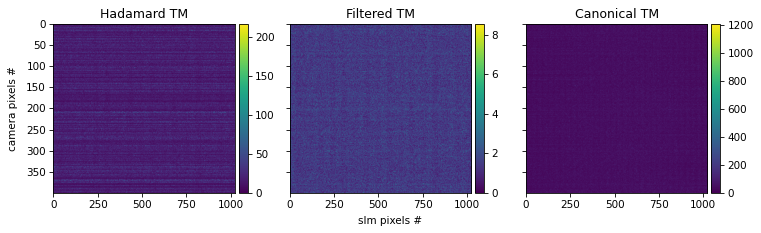

In [10]:
# if you want to load a pkl file
filepath  = '/home/optomeca/Documents/measurements/20231219/20231219-17:00_tm_raw_data_num_in1024_slm_macro11.pkl'
with open(filepath, 'rb') as fp:
    data = pickle.load(fp)

# or if you just performed the acquistion
data = frames

# calculate TM
tr = transmission_matrix.calcTM(data)
tm_had, tm_fil, tm = tr.calc_plot_tm(figsize=(10, 3))
# tm_had, tm_fil, tm = tr.calc_tm() # calc only - no plotting

### 3. Phase conjugation -  Focusing

In [184]:
# we close the camera and reinitialize it in order to set bin to 1
# and get a prettier picture
init.close_cam()

bins = 1
exposure_time = 60
init = InitExperiment(roi_size, off, bins, exposure_time, gain, timeout)
camera = init.init_cam()

In [137]:
# define target
target_shape = (int(tm.shape[0] ** 0.5), int(tm.shape[0] ** 0.5))

# instantiate phase conj
tgt = phase_conjugation.Target(target_shape)

# define the target - here either a small square or a gauss spot
x, y = (-1, 4)
target_frame = tgt.square((1,1 ), offset_x=x, offset_y=y, intensity=1)
# target_frame = tgt.gauss(num=16, order=0, w0=1e-4, slm_calibration_px=112)

# phase conjugation - create mask
msk = phase_conjugation.InverseLight(target_frame, tm, slm_macropixel=slm_macropixel, calib_px=112)
phase_mask = msk.inverse_prop(conj=True)

# merge phase mask into an slm pattern
patternSLM = pt.PatternsBacic(resX, resY)
focusing_mask = patternSLM.pattern_to_SLM(phase_mask, gray = 100)


# apply mask
slm.sendArray(focusing_mask)

Data transmitted


1

#### Take frame with and without mask

Data transmitted
Data transmitted
Data transmitted
949


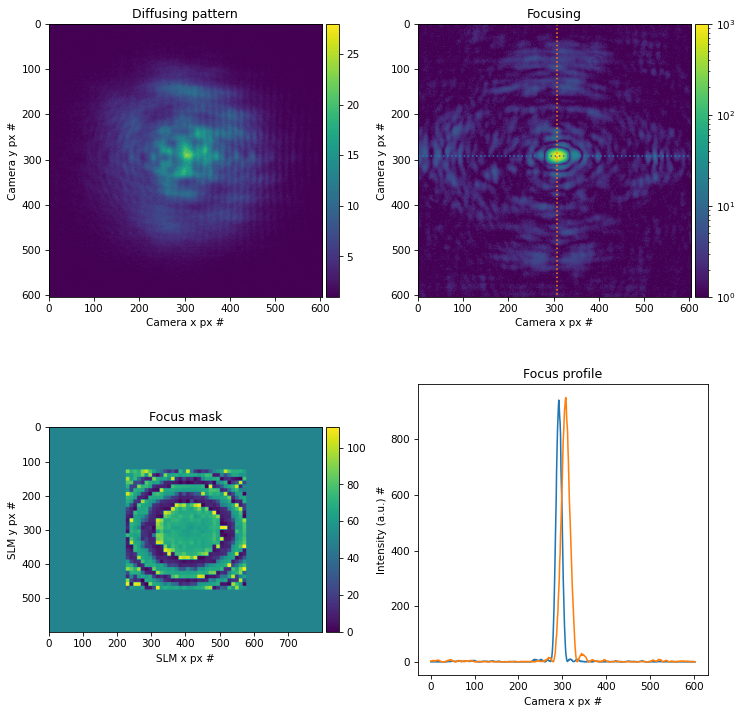

In [175]:

# apply mask
phase_mask = masks[3]
focusing_mask = patternSLM.pattern_to_SLM(phase_mask, gray = 50)

slm.sendArray(focusing_mask)
time.sleep(0.2)

# get frame
frame = camera.get_pending_frame_or_null()
frame_focus = np.copy(frame.image_buffer)
profile_line = len(frame_focus) // 2 

# set/get speckle
patSLM = pt.PatternsBacic(resX, resY)
mirror = patSLM.mirror()
slm.sendArray(mirror)
time.sleep(.2)
frame = camera.get_pending_frame_or_null()
frame_speck = np.copy(frame.image_buffer)

# plot

fig, axs = plt.subplots(2, 2, figsize=(10,10))

speck = axs[0, 0].imshow(frame_speck)
axs[0, 0].set_title("Diffusing pattern")
axs[0, 0].set_xlabel("Camera x px #")
axs[0, 0].set_ylabel("Camera y px #")
divider = make_axes_locatable(axs[0, 0])
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(speck, cax=cax)   

mask = axs[1, 0].imshow(focusing_mask)
axs[1, 0].set_title("Focus mask")
axs[1, 0].set_xlabel("SLM x px #")
axs[1, 0].set_ylabel("SLM y px #")
divider = make_axes_locatable(axs[1, 0])
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(mask, cax=cax)   

frame = axs[0, 1].imshow(frame_focus, norm=LogNorm(vmax=1000))
# frame = axs[0, 1].imshow(frame_focus)
# frame = axs[1].imshow(frame_focus)
axs[0, 1].hlines(profile_line - 10, 0, 600, colors='#1f77b4', linestyles='dotted')
axs[0, 1].vlines(profile_line + 5, 0, 600, colors='#ff7f0e', linestyles='dotted')


axs[0, 1].set_title("Focusing")
axs[0, 1].set_xlabel("Camera x px #")
axs[0, 1].set_ylabel("Camera y px #")
divider = make_axes_locatable(axs[0, 1])
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(frame, cax=cax)   

axs[1, 1].plot(frame_focus[:, profile_line + 5])
axs[1, 1].plot(frame_focus[profile_line - 10, :])
axs[1, 1].set_box_aspect(1)
axs[1, 1].set_title("Focus profile")
axs[1, 1].set_xlabel("Camera x px #")
axs[1, 1].set_ylabel("Intensity (a.u.) #")

fig.tight_layout()

slm.sendArray(focusing_mask)

figpath = tm_raw.filepath
plt.savefig(figpath, dpi=200, transparent=True)

print(np.max(frame_focus))
